In [1]:
# librerías
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from datetime import datetime

#from statsmodels.api import OLS, RLM
#from statsmodels.formula.api import ols, rlm, wls
import statsmodels.api as sm

import scipy.integrate as si

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# fecha para nombrar archivos
date = datetime.now()                                            
date = str(date).replace(':', '').replace(' ','_').split('.')[0] # cambio de formato

In [3]:
#sns.set_style('whitegrid')
sns.set(style="ticks", palette="Set2")
sns.despine()

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# formato de columnas pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [5]:
%matplotlib inline
%load_ext rpy2.ipython
%precision 3

'%.3f'

In [6]:
# DESCRIPCIÓN DE LOS CÓDIGOS

info_tramos = {1 : 'Negativas y cero',
               2 : 'De 0,001 a 3.000,00',
               3 : 'De 3.000,01 a 6.000,00',
               4 : 'De 6.000,01 a 12.000,00',
               5 : 'De 12.000,01 a 18.000,00',
               6 : 'De 18.000,01 a 30.000,00',
               7 : 'De 30.000,01 a 60.000,00',
               8 : 'De 60.000,01 a 120.000,00',
               9 : 'De 120.000,01 a 240.000,00',
               10 : 'De 240.000,01 en adelante'}

info_tramos = {1:'Negativas y 0.',
               2:'Desde 0 hasta 6000 euros.',
               3:'Desde 6000 hasta 12000 euros.',
               4:'Desde 12000 hasta 18000 euros.',
               5:'Desde 18000 hasta 24000 euros.',
               6:'Desde 24000 hasta 30000 euros.',
               7:'Desde 30000 hasta 36000 euros.',
               8:'Desde 36000 hasta 42000 euros.',
               9:'Desde 42000 hasta 48000 euros.',
               10:'Desde 48000 hasta 54000 euros.',
               11:'Desde 54000 hasta 60000 euros.',
               12:'De más de 60.000 euros.'}

info_ccaa = {1: 'ANDALUCÍA',
             2: 'ARAGÓN',
             3: 'PRINCIPADO DE ASTURIAS',
             4: 'ILLES BALEARS',
             5: 'CANARIAS',
             6: 'CANTABRIA',
             7: 'CASTILLA Y LEÓN',
             8: 'CASTILLA LA MANCHA',
             9: 'CATALUÑA',
             10: 'COMUNITAT VALENCIANA',
             11: 'EXTREMADURA',
             12: 'GALICIA',
             13: 'COMUNIDAD DE MADRID',
             14: 'REGIÓN DE MURCIA',
             17: 'LA RIOJA',
             18: 'CEUTA',
             19: 'MELILLA',
             20: 'NO RESIDENTES'}

In [7]:
!open .

# DESCRIPCIÓN DE LAS VARIABLES DE INTERÉS

In [8]:
# DESCRIPCIÓN DE LOS CÓDIGOS DE LAS PROVINCIAS

info_prov = pd.read_csv('data/cod_prov.csv', index_col=0)
info_prov.tail()

,prov
cod,
49,ZAMORA
50,ZARAGOZA
51,CEUTA
52,MELILLA
99,NO RESIDENTES


In [9]:
# DESCRIPCIÓN DE LAS VARIABLES

vdescrip = pd.read_table('data/Muestra2011/var_descrip.txt', index_col=0)
vdescrip['descrip'] = vdescrip.descrip.map(lambda x: x.upper())
vdescrip.head()

,descrip
variable,
prov,PROVINCIA
ca,COMUNIDAD AUTÓNOMA
dec,TIPO DE DECLARACIÓN
sexo,SEXO DEL DECLARANTE
EstCv,ESTADO CIVIL DEL DECLARANTE


# TRATAMIENTO DE LOS DATOS: SUBMUESTRA

- LIMPIEZA
- VARIABLES DE INTERES
- FILTRACIÓN DE LA MUESTRA A LAS VARIABLES DE INTERES

In [10]:
# DIRECTORIOS DE LOS DATOS

dir_all = 'data/Muestra2011/MuestraIRPF_2011.txt'
dir_less = 'data/Muestra2011/data2011.csv'

In [11]:
# TRABAJAR CON TODOS LOS DATOS
# CODIGOS DESACTIVADOS

# CÁLCULOS CON LA SUBMUESTRA

In [12]:
# variables monetarias en euros.
data = pd.read_csv(dir_less)

In [13]:
data.head()

,prov,ca,dec,sexo,EstCv,NmDesc,factor,PAR1,PAR9,PAR17,PAR18,PAR19,PAR20,PAR452,PAR455,PAR465,PAR620,PAR630,PAR698,PAR699,PAR720,PAR721,PAR741,PAR756,PAR760,PAR716,PAR772
0,2,8,C,2,2,1,1.0048,5083.60,5083.60,4080.00,0,0,1003.6,-2543.83,-2543.83,231.41,-2543.83,0,0,0,0,0,0,0,-122.48,0,0
1,2,8,C,1,4,2,1.0048,2562.19,2562.19,2543.86,0,0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,-5.80,0,0
2,2,8,C,1,2,3,1.0048,0.00,0.00,0.00,0,0,0.0,-936.74,-936.74,0.07,-936.74,0,0,0,0,0,0,1100,-142.86,0,0
3,2,8,C,2,2,0,1.0048,0.00,0.00,0.00,0,0,0.0,-6203.32,-6203.32,0.00,-6203.32,0,0,0,0,0,0,0,0.00,0,0
4,2,8,C,2,2,2,1.0048,5774.82,5774.82,4080.00,0,0,0.0,-3175.50,-3175.50,0.59,-3175.50,0,0,0,0,0,0,0,-0.75,0,0


In [14]:
# Según la documentación, la variable de tramos 
# se hace a patir de la suma de par452 y par465
# data['ingresos'] = data[['PAR452', 'PAR465']].sum(1)

In [15]:
# Función para separar miles y redondear a 3 decimales
def formato_nums(x):
    fn = lambda x: '{:,.3f}'.format(x).replace(',', ' ')
    res = list(map(fn, x))
    return res

In [16]:
# NOMBRES DE LAS VARIABLES
# añadir el nombre de la variable tramo
variables = ['tramo'] + list(data.columns)

In [22]:
for v in variables:
    print(v, end='\t\t')

tramo		prov		ca		dec		sexo		EstCv		NmDesc		factor		PAR1		PAR9		PAR17		PAR18		PAR19		PAR20		PAR452		PAR455		PAR465		PAR620		PAR630		PAR698		PAR699		PAR720		PAR721		PAR741		PAR756		PAR760		PAR716		PAR772		

In [23]:
# nombres de las variables monetarias
variables_monetarias = variables[8:]
data[variables_monetarias].head()

,PAR1,PAR9,PAR17,PAR18,PAR19,PAR20,PAR452,PAR455,PAR465,PAR620,PAR630,PAR698,PAR699,PAR720,PAR721,PAR741,PAR756,PAR760,PAR716,PAR772
0,5083.60,5083.60,4080.00,0,0,1003.6,-2543.83,-2543.83,231.41,-2543.83,0,0,0,0,0,0,0,-122.48,0,0
1,2562.19,2562.19,2543.86,0,0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,-5.80,0,0
2,0.00,0.00,0.00,0,0,0.0,-936.74,-936.74,0.07,-936.74,0,0,0,0,0,0,1100,-142.86,0,0
3,0.00,0.00,0.00,0,0,0.0,-6203.32,-6203.32,0.00,-6203.32,0,0,0,0,0,0,0,0.00,0,0
4,5774.82,5774.82,4080.00,0,0,0.0,-3175.50,-3175.50,0.59,-3175.50,0,0,0,0,0,0,0,-0.75,0,0


# COMPROBACIONES

In [24]:
# función que multiplica cualquier variable por la población
elevar_pob = lambda x: x * data.factor

In [25]:
# solo variables monetarias
dmonetarias = data[variables_monetarias]

In [26]:
# multiplica las variables monetarias por el factor
importe = dmonetarias.apply(elevar_pob)

In [27]:
# hace la media de las variables dividiendo la suma de cada variable por la suma de factores
media = importe.sum() / data.factor.sum()

In [28]:
# creo la tabla de resultados con la primera serie IMPORTE
res = pd.DataFrame(importe.sum(), columns=['IMPORTE'])

In [29]:
# creo la columna MEDIA
res['MEDIA'] = media

In [30]:
# creo las columnas minimo y máximo
res['MÍNIMO'] = dmonetarias.min()
res['MÁXIMO'] = dmonetarias.max()

In [31]:
res['IMPORTE'] = np.divide(res.IMPORTE, 10 ** 6)

In [32]:
res = res.apply(formato_nums)

In [33]:
res.head()

,IMPORTE,MEDIA,MÍNIMO,MÁXIMO
PAR1,393 844.000,20 230.718,0.000,27 676 513.630
PAR9,395 653.901,20 323.688,-49 100.000,27 709 267.780
PAR17,51 518.789,2 646.383,0.000,4 080.000
PAR18,133.876,6.877,0.000,5 966.250
PAR19,110.850,5.694,0.000,4 080.000


In [34]:
res['DESCRIPCIÓN'] = vdescrip.loc[variables_monetarias]

In [35]:
res = res[[res.columns[-1]] + list(res.columns[:-1])]

In [36]:
list(res.columns)

['DESCRIPCIÓN', 'IMPORTE', 'MEDIA', 'MÍNIMO', 'MÁXIMO']

In [37]:
_[1] = 'IMPORTE (MILLONES DE EUROS)'

In [38]:
_

['DESCRIPCIÓN', 'IMPORTE (MILLONES DE EUROS)', 'MEDIA', 'MÍNIMO', 'MÁXIMO']

In [39]:
res.columns = _

In [40]:
#res.to_html()

In [41]:
# TODO
# INTRODUCIR DATOS DE LA MEMORÍA Y COMPARAR.
# REAL Y MEDIA
# BADESPE = [393844000, ]

In [42]:
vdescrip

,descrip
variable,
prov,PROVINCIA
ca,COMUNIDAD AUTÓNOMA
dec,TIPO DE DECLARACIÓN
sexo,SEXO DEL DECLARANTE
EstCv,ESTADO CIVIL DEL DECLARANTE
NmDesc,NÚMERO DE DESCENDIENTES
factor,FACTOR DE ELEVACIÓN
PAR1,RENDIMIENTOS DEL TRABAJO: DINERARIAS
PAR9,RENDIMIENTOS DEL TRABAJO. TOTAL INGRESOS INTEGROS COMPUTABLES


In [43]:
data.head()

,prov,ca,dec,sexo,EstCv,NmDesc,factor,PAR1,PAR9,PAR17,PAR18,PAR19,PAR20,PAR452,PAR455,PAR465,PAR620,PAR630,PAR698,PAR699,PAR720,PAR721,PAR741,PAR756,PAR760,PAR716,PAR772
0,2,8,C,2,2,1,1.0048,5083.60,5083.60,4080.00,0,0,1003.6,-2543.83,-2543.83,231.41,-2543.83,0,0,0,0,0,0,0,-122.48,0,0
1,2,8,C,1,4,2,1.0048,2562.19,2562.19,2543.86,0,0,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,-5.80,0,0
2,2,8,C,1,2,3,1.0048,0.00,0.00,0.00,0,0,0.0,-936.74,-936.74,0.07,-936.74,0,0,0,0,0,0,1100,-142.86,0,0
3,2,8,C,2,2,0,1.0048,0.00,0.00,0.00,0,0,0.0,-6203.32,-6203.32,0.00,-6203.32,0,0,0,0,0,0,0,0.00,0,0
4,2,8,C,2,2,2,1.0048,5774.82,5774.82,4080.00,0,0,0.0,-3175.50,-3175.50,0.59,-3175.50,0,0,0,0,0,0,0,-0.75,0,0


In [44]:
obs = len(data)
declas = data.factor.sum()
real = 19467730
diff_porc = (declas - real) * 100 / declas

In [46]:
# TABLA 1
# TABLA TAMAÑO DE LA MUESTRA 
pd.DataFrame([obs, declas, real, diff_porc], columns=['TOTAL'], index=['OBSERVACIONES MUESTRA', 
                                                            'DECLARACIONES MUESTRA', 
                                                            'DECLARACIONES AEAT',
                                                            'DIFERENCIA PORCENTAJE']).apply(formato_nums)

,TOTAL
OBSERVACIONES MUESTRA,2 036 186.000
DECLARACIONES MUESTRA,19 467 623.101
DECLARACIONES AEAT,19 467 730.000
DIFERENCIA PORCENTAJE,-0.001


In [47]:
# crea una tabla donde las filas son las provincias, y los valores son los factores.
tabla_3 = pd.pivot_table(data, index='prov', values='factor', aggfunc='sum')

In [50]:
# convertir en dataframe
tabla_3 = pd.DataFrame(tabla_3)

In [51]:
# cambiar nombre de columna
tabla_3.columns = ['Nº DECLARACIONES MUESTRA']

In [52]:
# agregar la columna nº de observaciones
tabla_3['Nº OBSERVACIONES'] = pd.pivot_table(data, index='prov', values='factor', aggfunc='count')

In [53]:
# agregar descripción del codigo de provincia
tabla_3['PROVINCIA'] = info_prov.loc[tabla_3.index]

In [54]:
# introducir el código como columna
tabla_3.reset_index(inplace=True)

In [55]:
# cambiar nombre
tabla_3 = tabla_3.rename(columns={'prov':'CÓDIGO PROVINCIA'})

In [56]:
# ordenar las columnas
tabla_3 = tabla_3[tabla_3.columns[[0,3,2,1]]]

In [57]:
# agregar total
tabla_3.loc[49] = ['-', 'TOTAL', tabla_3['Nº OBSERVACIONES'].sum(), tabla_3['Nº DECLARACIONES MUESTRA'].sum()]

In [58]:
#tabla_3.ix[:,-2:] = tabla_3.ix[:,-2:].apply(formato_nums)

In [59]:
tabla_3.head()

,CÓDIGO PROVINCIA,PROVINCIA,Nº OBSERVACIONES,Nº DECLARACIONES MUESTRA
0,2,ALBACETE,28396,174144.515000
1,3,ALICANTE,66221,715160.654499
2,4,ALMERIA,34520,256571.027100
3,5,ÁVILA,18185,76925.266300
4,6,BADAJOZ,35798,285492.998500


In [52]:
# tabla_3.to_html(index=False)

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


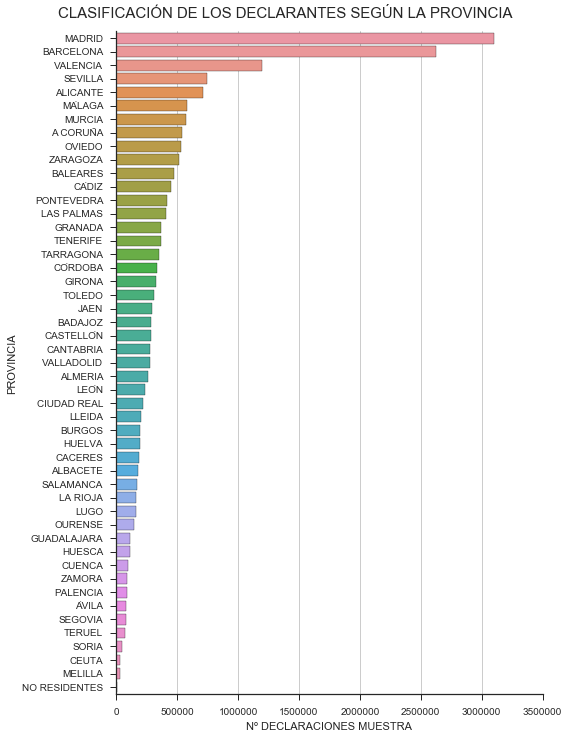

In [60]:
d = tabla_3.iloc[:-1].sort_values(by='Nº DECLARACIONES MUESTRA', ascending=False)

plt.figure(figsize=(8,10))

g = sns.barplot(d['Nº DECLARACIONES MUESTRA'], d['PROVINCIA'], orient='horizontal')
g.grid(True, axis='x')

sns.despine()

plt.suptitle('CLASIFICACIÓN DE LOS DECLARANTES SEGÚN LA PROVINCIA', fontsize=15, y=1.02)
plt.xlabel('Nº DECLARACIONES MUESTRA')

plt.tight_layout()

In [61]:
# distribucion por niveles:
# renta = PAR(455 + 465 + 17 +18 + 19 + 20) = [17, 18, 19, 20, 455, 465]
variables_renta = ['PAR%s' % e for e in [452, 465]]
variables_renta

['PAR452', 'PAR465']

In [62]:
data['renta'] = data[variables_renta].sum(1)

In [63]:
tramos = [-np.inf,0, 6000, 12000, 18000, 24000, 30000, 36000, 42000, 48000, 54000, 60000, np.inf]
data['tramo'] = pd.cut(data.renta, tramos, precision=4, include_lowest=False, right=True)

In [64]:
data.groupby('tramo')[['renta', 'factor']].sum()

,renta,factor
tramo,,
"(-inf, 0]",-1.335249e+09,341713.829001
"(0, 6000]",2.333967e+09,3689557.802311
"(6000, 12000]",1.147506e+09,3673519.240100
"(12000, 18000]",7.399605e+08,3663939.483300
"(18000, 24000]",5.374425e+08,2686260.701600
"(24000, 30000]",4.209746e+08,1821765.249600
"(30000, 36000]",3.297071e+08,1286036.525500
"(36000, 42000]",2.843355e+08,721225.642000
"(42000, 48000]",2.426647e+08,418208.739000


In [65]:
d = data.pivot_table(index='tramo', values='factor', aggfunc='count')

In [66]:
d = pd.DataFrame(d)

In [67]:
d['suma'] = data.pivot_table(index='tramo', values='factor', aggfunc='sum')

In [68]:
d.index = list(d.index)

In [69]:
d['porcentaje'] = d.suma * 100 / d.suma.sum()

In [70]:
d.loc['TOTAL'] = d.sum()

In [71]:
d.columns = ['Nº OBS (Muestra)', 'Nº DECLARACIONES (Muestra)', 'PORCENTAJE']

In [72]:
d.apply(formato_nums)

,Nº OBS (Muestra),Nº DECLARACIONES (Muestra),PORCENTAJE
"(-inf, 0]",337 172.000,341 713.829,1.755
"(0, 6000]",773 714.000,3 689 557.802,18.952
"(6000, 12000]",126 666.000,3 673 519.240,18.870
"(12000, 18000]",49 805.000,3 663 939.483,18.821
"(18000, 24000]",25 916.000,2 686 260.702,13.799
"(24000, 30000]",15 692.000,1 821 765.250,9.358
"(30000, 36000]",10 049.000,1 286 036.525,6.606
"(36000, 42000]",7 347.000,721 225.642,3.705
"(42000, 48000]",5 416.000,418 208.739,2.148
"(48000, 54000]",4 191.000,280 259.808,1.440


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


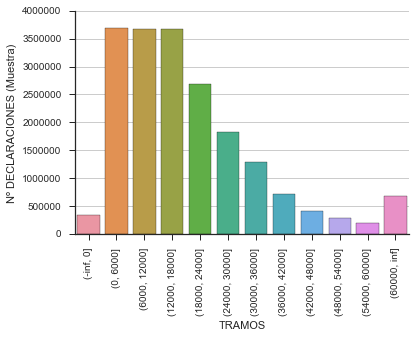

In [73]:
g = sns.barplot(data=d.reset_index().iloc[:-1], x='index', y=d.columns[1])
g.grid(True, axis='y')
plt.gca().set_xticklabels(d.index[:-1], rotation =90)
sns.despine()
plt.xlabel('TRAMOS')
plt.ylabel(d.columns[1])

In [117]:
d = data[['renta', 'factor','tramo']].copy()

In [118]:
d['fi'] = d.factor / d.factor.sum()

In [119]:
d['Fi'] = d.fi.cumsum()

In [120]:
d['wi'] = 1 / d.fi

In [121]:
d['xifi'] = d.renta * d.fi

In [123]:
d.xifi.sum()

20106.654

In [173]:
d['vhat'] = ((d.renta - d.xifi.sum())**2) * d.fi

In [174]:
d.vhat.mean() * d.factor.sum() / (d.factor.sum() - 1)

1581.241

In [175]:
np.sqrt(_)

39.765

In [ ]:
data.dec

In [183]:
d = data[['dec', 'factor']].groupby('dec').sum()

In [184]:
d

,factor
dec,
C,4332938.732406
I,15134684.368312


In [185]:
d['porentaje'] = d.factor * 100 /d.factor.sum()

In [186]:
d.reset_index(inplace=True)

In [187]:
d.columns = ['Tipo', 'Declaraciones', 'Porcentaje']

In [188]:
d.loc['-'] = ['TOTAL']+list(d.ix[:,1:].sum())

In [189]:
d.ix[:,1:] = d.ix[:,1:].apply(formato_nums)

In [190]:
d

,Tipo,Declaraciones,Porcentaje
0,C,4 332 938.732,22.257
1,I,15 134 684.368,77.743
-,TOTAL,19 467 623.101,100.000


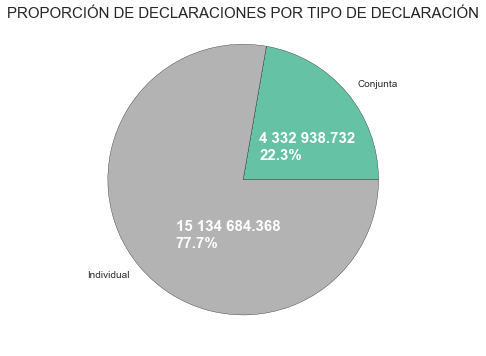

In [167]:
plt.figure(figsize=(5,5))

d = data.groupby('dec')['factor'].sum()
dp = d * 100/ d.sum()

d.index = ['Conjunta', 'Individual']

d.plot(kind='pie', colormap='Set2')

plt.xlabel('')
plt.ylabel('')
plt.text(0.12,
         0.15, 
         formato_nums(d.values)[0]+'\n{:.1f}%'.format(dp.values[0]), 
         color='white', 
         fontsize=15, 
         fontweight='bold')

plt.text(-0.5,
         -0.5, formato_nums(d.values)[1]+'\n{:.1f}%'.format(dp.values[1]), 
         color='white', 
         fontsize=15, 
         fontweight='bold')

ttl = 'PROPORCIÓN DE DECLARACIONES POR TIPO DE DECLARACIÓN'
plt.suptitle(ttl, fontsize=15)

plt.tight_layout()

# DECILAS

In [191]:
v = ['renta', 'factor']
d = data[v].copy()

In [192]:
d.sort_values(by='renta', inplace=True)

In [193]:
d['xini'] = np.multiply(d['renta'], d['factor'])

In [194]:
d.head()

,renta,factor,xini
1003646,-10964259.24,1.0011,-10976319.925164
500483,-8204286.19,1.0002,-8205927.047238
236710,-7515213.73,1.0015,-7526486.550595
1816225,-4395015.71,1.0006,-4397652.719426
1815837,-4390335.40,1.0006,-4392969.601240


In [195]:
d['fi'] = d.factor / d.factor.sum()

In [196]:
d['Fi'] = d.fi.cumsum()

In [197]:
d.head()

,renta,factor,xini,fi,Fi
1003646,-10964259.24,1.0011,-10976319.925164,5.142384e-08,5.142384e-08
500483,-8204286.19,1.0002,-8205927.047238,5.137761e-08,1.028015e-07
236710,-7515213.73,1.0015,-7526486.550595,5.144439e-08,1.542458e-07
1816225,-4395015.71,1.0006,-4397652.719426,5.139816e-08,2.056440e-07
1815837,-4390335.40,1.0006,-4392969.601240,5.139816e-08,2.570422e-07


In [198]:
d2 = 0.1
d1 = d2 - 0.1

decila = d[(d1 < d.Fi) & (d.Fi <= d2)]

nh = len(decila)

decila_media = decila.xini.sum() / decila.factor.sum()

decila_min, decila_max = decila.renta.min(), decila.renta.max()

decila_stats = sm.stats.DescrStatsW(decila.renta, weights=decila.factor)

In [199]:
decila_stats.mean

210.037

In [201]:
decila.xini.std()

25052.303

Teniendo en cuenta que la varianza en el caso discreto es: 

$\sigma_X^2 = ( \sum_{i=1}^n p_i\cdot(x_i - \mu)^2)$

In [202]:
decila_media, decila_min, decila_max

(210.037, -10964259.240, 2654.860)

In [206]:
d.head()

,renta,factor,xini,fi,Fi
1003646,-10964259.24,1.0011,-10976319.925164,5.142384e-08,5.142384e-08
500483,-8204286.19,1.0002,-8205927.047238,5.137761e-08,1.028015e-07
236710,-7515213.73,1.0015,-7526486.550595,5.144439e-08,1.542458e-07
1816225,-4395015.71,1.0006,-4397652.719426,5.139816e-08,2.056440e-07
1815837,-4390335.40,1.0006,-4392969.601240,5.139816e-08,2.570422e-07


# -------------> !!!!!!!!!!!!!!!!!!!! continuar desde aqui

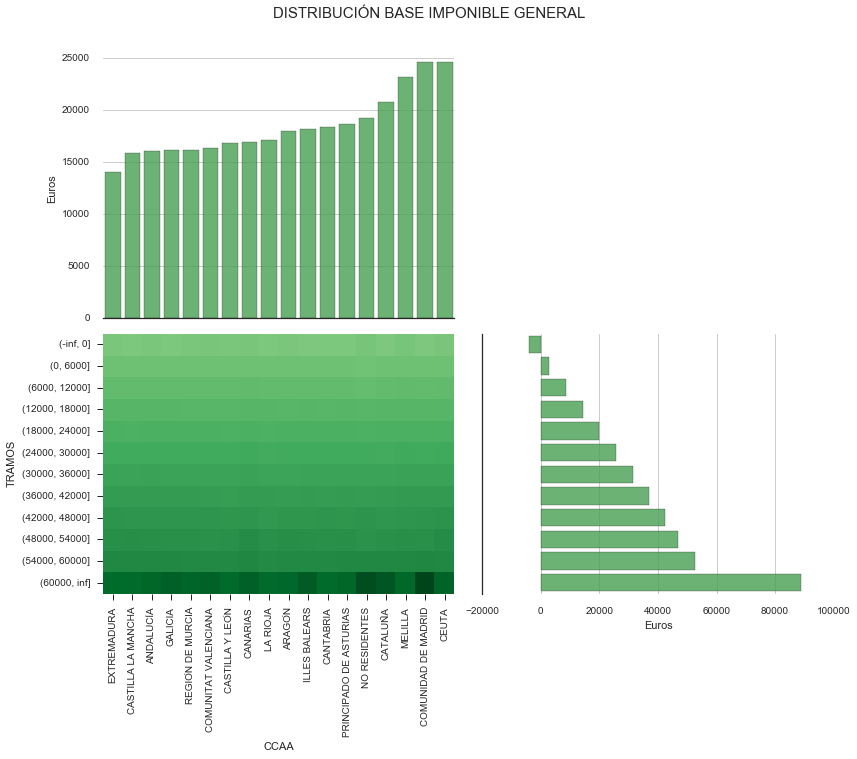

In [156]:
# GRAFICO
#########

d = media_pond_ij.copy()
d_ca = media_pond_ca.copy()
d_tramo = media_pond_tramo.copy()

# figuras
fs = (12,10)
plt.figure(figsize=fs)
ax1 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)
ax2 = plt.subplot(2,2,1)

# ordenar ca
ca_order = d_ca.sort_values(ascending=True).index
d_ca = d_ca[ca_order]
d = d[ca_order]


#d.index = [info_tramos[i] for i in d.index]

# traducir los códigos a nombres de ccaa
d.columns = [info_ccaa[c] for c in d.columns]

# densidad
sns.heatmap(d, 
            ax=ax1, 
            cbar=False, 
            cmap='Greens', 
            robust=False)

# barras ccaa
g2 = sns.barplot(x=d_ca.index, 
                 y=d_ca.values, 
                 ax=ax2, 
                 color=sns.xkcd_rgb["medium green"],
                 alpha=0.8)
# barra tramos
g3 = sns.barplot(x=d_tramo.values, 
                 y=d_tramo.index, 
                 ax=ax3, 
                 orient='horizontal', 
                 color=sns.xkcd_rgb["medium green"],
                 alpha=0.8)

# limpiar el lienzo de las barras
sns.despine(ax=ax2, left=True, bottom=False)
sns.despine(ax=ax3, left=False, bottom=True)

# añadir rejilla
ax2.yaxis.grid(True)
ax3.xaxis.grid(True)

# quitar etiquetas
ax2.set_xlabel('')
ax2.tick_params(axis='both', 
                which='both', 
                bottom='off', 
                top='off', 
                labelbottom='off', 
                right='off', 
                left='off', 
                labelleft='on')
ax3.set_ylabel('')
ax3.tick_params(axis='both', 
                which='both', 
                bottom='off', 
                top='off', 
                labelbottom='on', 
                right='off', 
                left='off', 
                labelleft='off')


# añadir etiquetas de los valores
ax2.set_ylabel('Euros')
ax3.set_xlabel('Euros')

# etiquetar los ejes de las barras
ax1.set_xlabel('CCAA')
ax1.set_ylabel('TRAMOS')

# titulo
plt.suptitle('DISTRIBUCIÓN %s' % str_vname, fontsize=15, y=1.05)

# ajustar
plt.tight_layout()

# guardar grafico
plt.savefig('imgs/dist_%s_%s' % (date, var_name), bbox_inches='tight')

In [145]:
media_pond_tramo.copy()

tramo
(-inf, 0]         -4053.886690
(0, 6000]          2676.583957
(6000, 12000]      8493.833141
(12000, 18000]    14316.599822
(18000, 24000]    20034.785089
(24000, 30000]    25682.625034
(30000, 36000]    31531.682226
(36000, 42000]    36923.826060
(42000, 48000]    42278.131219
(48000, 54000]    46723.753140
(54000, 60000]    52771.641256
(60000, inf]      88958.755078
dtype: float64

In [146]:
pd.DataFrame(_).apply(formato_nums)

,0
tramo,
"(-inf, 0]",-4 053.887
"(0, 6000]",2 676.584
"(6000, 12000]",8 493.833
"(12000, 18000]",14 316.600
"(18000, 24000]",20 034.785
"(24000, 30000]",25 682.625
"(30000, 36000]",31 531.682
"(36000, 42000]",36 923.826
"(42000, 48000]",42 278.131


In [147]:
print(_)

                         0
tramo                     
(-inf, 0]       -4 053.887
(0, 6000]        2 676.584
(6000, 12000]    8 493.833
(12000, 18000]  14 316.600
(18000, 24000]  20 034.785
(24000, 30000]  25 682.625
(30000, 36000]  31 531.682
(36000, 42000]  36 923.826
(42000, 48000]  42 278.131
(48000, 54000]  46 723.753
(54000, 60000]  52 771.641
(60000, inf]    88 958.755


In [207]:
# comprobaciones
# base imponible general <= 0
# declaraciones = 57.835
# BL total millones de euros 360,1
# media -6.226 euros
d = data.loc[:,['PAR455', 'factor', 'tramo']]

In [208]:
# menores o iguales a cero
d = d[d.PAR455 <= 0]

In [209]:
# variable poblacional
d['x*w'] = d.PAR455 * d.factor

In [213]:
# total
d['x*w'].sum()

-1455981021.975

In [215]:
formato_nums([_])

['-1 455 981 021.975']

In [220]:
# declaraciones
d.factor.sum()

873516.267

In [221]:
formato_nums([_])

['873 516.267']

In [222]:
len(d)

429824

In [223]:
formato_nums([_])

['429 824.000']

In [225]:
# declaraciones
formato_nums([d.factor.sum()])

['873 516.267']

In [226]:
# total de declaraciones = 18.775.312
# total de BL total = 361.944,7
# total media = 19.278


In [227]:
vdescrip

,descrip
variable,
prov,PROVINCIA
ca,COMUNIDAD AUTÓNOMA
dec,TIPO DE DECLARACIÓN
sexo,SEXO DEL DECLARANTE
EstCv,ESTADO CIVIL DEL DECLARANTE
NmDesc,NÚMERO DE DESCENDIENTES
factor,FACTOR DE ELEVACIÓN
PAR1,RENDIMIENTOS DEL TRABAJO: DINERARIAS
PAR9,RENDIMIENTOS DEL TRABAJO. TOTAL INGRESOS INTEGROS COMPUTABLES


In [228]:
# GRAFICO 3d
#########

d = media_pond_ij.copy()
d_ca = media_pond_ca.copy()
d_tramo = media_pond_tramo.copy()

d = pd.DataFrame(d.unstack().reset_index())
colnames = list(d.columns)
colnames[-1] = 'media'
d.columns = colnames
d.head()

NameError: name 'media_pond_ij' is not defined

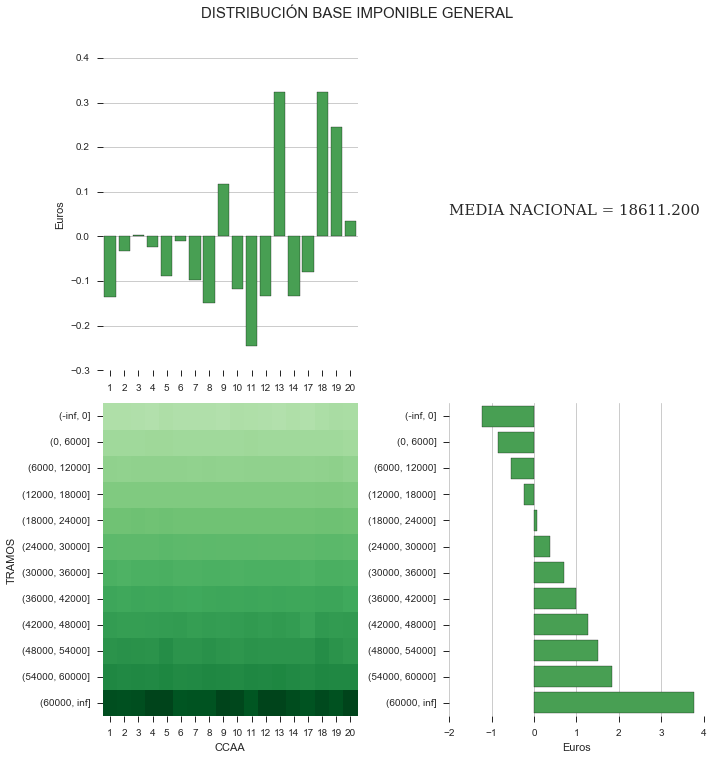

In [150]:
# GRÁFICOS DIFERENCIA RESPECTO DE LA MEDIA NACIONAL
ttl = 'DISTRIBUCIÓN %s' % str_vname
fs = (10,10)
# subplots
plt.figure(figsize=fs)
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
ax2.text(0, 0.5,'MEDIA NACIONAL = %.3f' % media_nacional, 
         fontsize=15, 
         family='Serif')

# barras
g1 = sns.barplot(x=media_pond_ca.index, 
                 y=(media_pond_ca - media_nacional)/media_nacional, 
                 ax=ax1, 
                 color=sns.xkcd_rgb["medium green"])#.set_xticklabels('')

g4 = sns.barplot(x=(media_pond_tramo - media_nacional)/media_nacional,
                 y=media_pond_tramo.index,
                 ax=ax4,
                 orient='horizontal',
                 color=sns.xkcd_rgb["medium green"])#.set_yticklabels('')

# densidad
sns.heatmap(data=(media_pond_ij - media_nacional)/media_nacional,
            ax=ax3, 
            cbar=False, 
            cmap='Greens', 
            robust=True, 
            annot=False, 
            square=False, 
            fmt='.2f')

# estilo
plt.suptitle(ttl, fontsize=15, y=1.05)

sns.despine(ax=ax1, left=True, bottom=True)
sns.despine(ax=ax4, left=True, bottom=True)
sns.despine(ax=ax2, left=True, bottom=True)

ax1.set_xlabel('')
ax4.set_ylabel('')

ax1.set_ylabel('Euros')
ax4.set_xlabel('Euros')

ax1.yaxis.grid(True)
ax4.xaxis.grid(True)

ax3.set_ylabel('TRAMOS')
ax3.set_xlabel('CCAA')

ax2.tick_params(axis='both', 
                which='both', 
                bottom='off', 
                top='off', 
                labelbottom='off', 
                right='off', 
                left='off', 
                labelleft='off')

# descripción
plt.tight_layout()
plt.savefig('imgs/dist_sobre_media_%s_%s' % (str_vname, date), bbox_inches='tight')

In [151]:
# DISTRIBUCIÓN ACUMULADA: LORENTZ(%POBLACION, $)
lc = {}

for v in variables_monetarias:
#    v = list(v)                                 # Para cada par (factor, variable interes) 
    cdf = data.loc[:,[v, 'factor']].copy()        # creamos la variable funcion de densidad acumulada cdf

    cdf = cdf.sort_values(by=v,              # ordenamos la variable monetaria de menor a mayor
                          ascending=True)

    cdf[v] = cdf.product(axis=1)             # variable monetaria a poblacional (W * variable)

    cdf = cdf.cumsum() / cdf.sum()  # suma acumulada y dividimos por el total para normalizar

    lc[v] = [cdf.factor.values, cdf[v].values]           # guardamos el resultado

lc.keys()

dict_keys(['PAR620', 'PAR18', 'PAR772', 'PAR465', 'PAR699', 'PAR452', 'PAR720', 'PAR630', 'PAR20', 'PAR1', 'PAR455', 'PAR760', 'PAR9', 'PAR19', 'PAR741', 'PAR756', 'PAR698', 'PAR721', 'PAR716', 'PAR17'])

            Gini
PAR17   0.186768
PAR1    0.450976
PAR9    0.451842
PAR455  0.478219
PAR452  0.479370
PAR620  0.490741
PAR699  0.681332
PAR698  0.681479
PAR720  0.704434
PAR721  0.710242
PAR741  0.714734
PAR465  0.910197
PAR630  0.911559
PAR756  0.968481
PAR716  0.970543
PAR772  0.970543
PAR20   0.986910
PAR18   0.997569
PAR19   0.998001


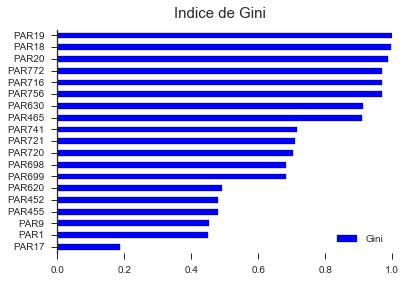

In [155]:
# indice de gini
# TODO COMPROBAR

gini = {}

for k in lc.keys():
    if k == 'PAR760': continue
    area_total = 0.5
    area_bajo = si.trapz(x = lc[k][0],
                         y = lc[k][1])
    area_entre = area_total - area_bajo
    gini[k] = 2 * area_entre

df_gini = pd.DataFrame.from_dict(gini, orient='index').sort_values(by=0)
df_gini.columns = ['Gini']
df_gini.plot(kind='barh')

sns.despine(bottom=True, 
            right=True)

plt.suptitle('Indice de Gini', fontsize=15)
plt.savefig('imgs/gini_%s.png' % date, bbbox_inches='tight')

print(df_gini)

In [83]:
# GLC PARA CADA VARIABLE DE INTERÉS
# Determinar el numero de gráficos
# TODO Hacer el glc

n = [len(glc) if len(glc) % 2 == 0 else len(glc) + 1][0]
fig = plt.figure(figsize=(10,2*n))
axs = list()

for i, k in enumerate(glc.keys()):
    globals()['ax%s' % (i+1)] = fig.add_subplot(n/2, 2, i+1)
    axs.append(globals()['ax%s' % (i+1)])
    axs[-1].plot(glc[k][0], glc[k][1], label = k)

plt.suptitle('Curva de Lorentz Generalizada', fontsize = 15, y = 1.05)

for a in axs:
    a.set_xlabel('% Población')
    a.set_ylabel('Media (Percentil)')
    a.legend(loc=0)
    a.set_xlim(0,100)
    a.yaxis.set_major_formatter(FuncFormatter(formatter))
    a.grid(True)

plt.tight_layout()
plt.savefig('imgs/glc_%s_%s.png' % ('principales', date), bbox_iches='tight')

NameError: name 'glc' is not defined

In [85]:
for i in range(1,27, 2):
    s = '![](doc/imgs/%s.png)'
    print(s % i)
    print(s % (i+1))
    print()

![](doc/imgs/1.png)
![](doc/imgs/2.png)

![](doc/imgs/3.png)
![](doc/imgs/4.png)

![](doc/imgs/5.png)
![](doc/imgs/6.png)

![](doc/imgs/7.png)
![](doc/imgs/8.png)

![](doc/imgs/9.png)
![](doc/imgs/10.png)

![](doc/imgs/11.png)
![](doc/imgs/12.png)

![](doc/imgs/13.png)
![](doc/imgs/14.png)

![](doc/imgs/15.png)
![](doc/imgs/16.png)

![](doc/imgs/17.png)
![](doc/imgs/18.png)

![](doc/imgs/19.png)
![](doc/imgs/20.png)

![](doc/imgs/21.png)
![](doc/imgs/22.png)

![](doc/imgs/23.png)
![](doc/imgs/24.png)

![](doc/imgs/25.png)
![](doc/imgs/26.png)



In [103]:
# funcoin para construir los tramos de renta
def convertir_tramos(x):
    tramos = [0, 6000, 12000, 18000, 24000, 30000, 36000, 42000, 48000, 54000, 60000]
    for i, tramo in enumerate(tramos):
        if x > tramos[-1]:
            return len(tramos)
        elif x > tramo: continue
        return i+1
# data['tramo'] = data.renta.map(binned)